# Neural Networks with Bias and Variance: GPU Accelerated

## Overview
This project demonstrates how different neural network models (simple and complex) behave under various levels of bias and variance. The code uses synthetic data to train and evaluate both a simple linear model (high bias) and a complex deep neural network (low bias, high variance). The training is GPU-accelerated for efficiency.

## Features
- **Synthetic Data Generati  - A sinusoidal function \( y = \sin(x) \) is used as the true function.
ction.
  - Two datasets are created:
    - **Low Variance**: Small noise added to \( y \).
    - **High Variance**: Large noise added to \( y \).

- **Model Definitions**:
  - **Simple Model**:
    - A single linear layer, representing high-bias, underfitting behavior.
  - **Complex Model**:
    - Two hidden layers with 64 neurons each, representing low-bias, overfitting behavior.

- **Visualization**:
  - Scatter plots of noisy data with overlaid predictions from both models.
  - Clear distinction between model predictions for low and high variance datasets.

- **GPU Utilization**:
  - GPU acceleration enabled using TensorFlow's `tf.device('/GPU:0')` for faster training.

## Code Workflow
1. **Data Generation**:
   - Synthetic data is generated for training and visualization.
   - Variance levels are introduced to demonstrate noise in real-world data.

2. **Model Training**:
   - Two models (simple and complex) are trained on both low and high variance datasets.
   - Training is performed on a GPU if available.

3. **Visualization**:
   - Predictions from both models are compared against the noisy datasets and the true function.

4. **GPU Check**:
   - The script checks for GPU availability and uses it if detected.

## Prerequisites
- **Python Libraries**:
  - TensorFlow (with GPU support)
  - NumPy
  - Matplotlib
- **GPU Requirements**:
  - NVIDIA GPU with CUDA and cuDNN installed.
  - Alternatively, run on Google Colab or another cloud pMohammed A. ShehabAuthor
**Name:** [Your Name]  
**Date:** [Date]  
**Purpose:** Demonstrate the effects of bias and variance on neural network models, leveraging GPU acceleration for efficient training.

## How to Run
1. Install required libraries:
   ```bash
   pip install tensorflow matplotlib numpy


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

Check if TensorFlow is using the GPU

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("TensorFlow is using the GPU.")
else:
    print("No GPU detected. TensorFlow will run on the CPU.")


Num GPUs Available:  1
TensorFlow is using the GPU.


## Generate synthetic data

In [6]:
np.random.seed(42)
x = np.linspace(0, 2 * np.pi, 1_000)
y_true = np.sin(x)

## Add noise to create low and high variance datasets

In [7]:
y_low_variance = y_true + np.random.normal(0, 0.1, len(x))  # Low variance
y_high_variance = y_true + np.random.normal(0, 0.5, len(x))  # High variance

## Plot data

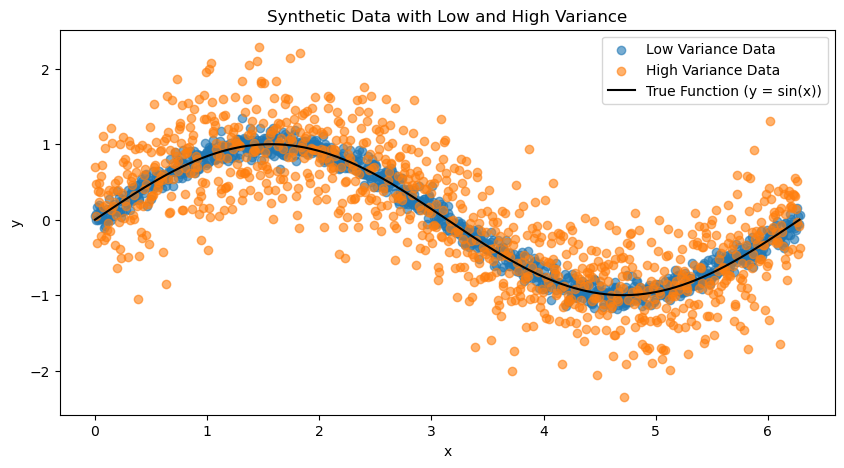

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y_low_variance, label="Low Variance Data", alpha=0.6)
plt.scatter(x, y_high_variance, label="High Variance Data", alpha=0.6)
plt.plot(x, y_true, label="True Function (y = sin(x))", color="black")
plt.title("Synthetic Data with Low and High Variance")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Prepare data for training

In [11]:
x_train, x_test, y_train_low_var, y_test_low_var = train_test_split(
    x, y_low_variance, test_size=0.2, random_state=42
)
_, _, y_train_high_var, y_test_high_var = train_test_split(
    x, y_high_variance, test_size=0.2, random_state=42
)

In [12]:
# Reshape for model input
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

## Define a simple model (high bias)

In [13]:
simple_model = Sequential([Dense(1, activation='linear', input_shape=(1,))])
simple_model.compile(optimizer='adam', loss='mse')

## Define a complex model (low bias, high variance)

In [14]:
complex_model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
complex_model.compile(optimizer='adam', loss='mse')

### Train and evaluate models on low variance data

In [30]:
with tf.device('/GPU:0'):  # Explicitly run training on GPU
    simple_model.fit(x_train, y_train_low_var, epochs=100, verbose=0)
    complex_model.fit(x_train, y_train_low_var, epochs=100, verbose=0)

In [31]:
y_pred_simple_low = simple_model.predict(x_test)
y_pred_complex_low = complex_model.predict(x_test)

7/7 [==============================] - 0s 1ms/step


### Plot predictions for low-variance data

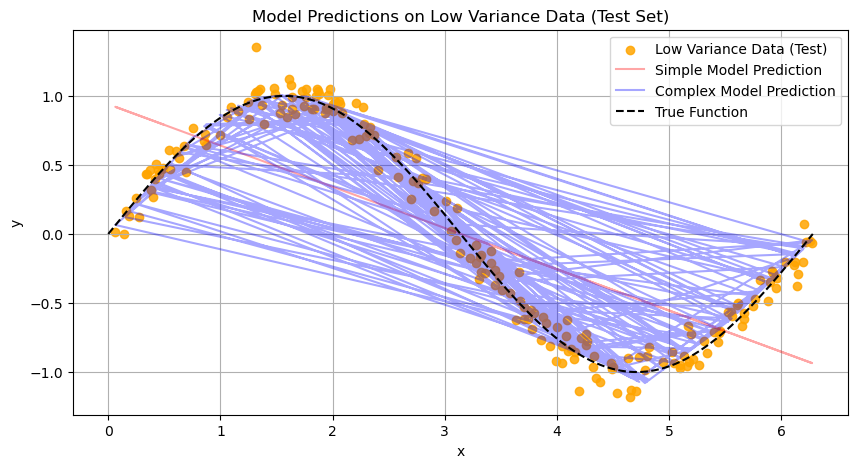

In [40]:
plt.figure(figsize=(10, 5))
plt.scatter(x_test, y_test_low_var, label="Low Variance Data (Test)", color="orange",alpha=0.85)
plt.plot(x_test, y_pred_simple_low, label="Simple Model Prediction", color="red", alpha=0.35)
plt.plot(x_test, y_pred_complex_low, label="Complex Model Prediction", color="blue", alpha=0.35)
plt.plot(x, y_true, label="True Function", color="black", linestyle="--")
plt.title("Model Predictions on Low Variance Data (Test Set)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(axis="both")
plt.show()

### Train and evaluate models on high variance data

In [33]:
with tf.device('/GPU:0'):  # Explicitly run training on GPU
    simple_model.fit(x_train, y_train_high_var, epochs=100, verbose=0)
    complex_model.fit(x_train, y_train_high_var, epochs=100, verbose=0)

In [34]:
y_pred_simple_high = simple_model.predict(x_test)
y_pred_complex_high = complex_model.predict(x_test)

7/7 [==============================] - 0s 1ms/step


### Plot predictions for high-variance data

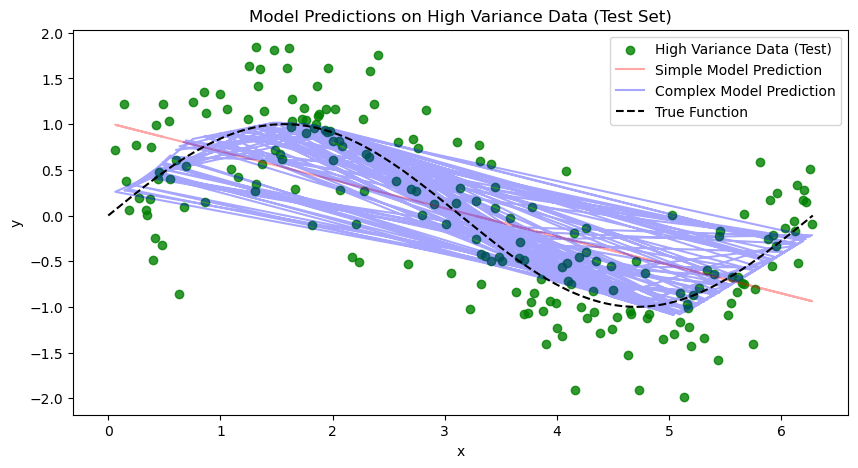

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(x_test, y_test_high_var, label="High Variance Data (Test)", color="green",alpha=0.8)
plt.plot(x_test, y_pred_simple_high, label="Simple Model Prediction", color="red", alpha=0.35)
plt.plot(x_test, y_pred_complex_high, label="Complex Model Prediction", color="blue", alpha=0.35)
plt.plot(x, y_true, label="True Function", color="black", linestyle="--")
plt.title("Model Predictions on High Variance Data (Test Set)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()